# Prosper Loan Data Exploration
## by Peter Sabry

## Table of Contents:
* [Preliminary Wrangling](#wrangling)
* [Univariate Exploration](#univariate)
  - [Numerical Columns](#num-cols)
  - [Categorical Columns](#cat-cols)
  - [Time Columns](#time-cols)
* [Bivariate Exploration](#bivariate)
* [Multivariate Exploration](#multivariate)
* [References](#ref)

## Preliminary Wrangling <a class="anchor" id="wrangling"></a>

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Data was downloaded from [this link](https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv), in addition data dictionary [in this link](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading data from CSV file and start basic wrangling.

In [2]:
rawData = pd.read_csv('prosperLoanData_2.csv')
rawData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
print(rawData.shape)

(113937, 81)


>There are 113,937 records and 81 columns which is much, we can select only the interesting columns to analyze; columns of interest are related to loan amount, status and types, interest rates and some demographics about the borrowers.

In [4]:
#Take only the interesting columns
df_loans = rawData.loc[:,('ListingCreationDate',
                          'DateCreditPulled',
                          'Term',
                          'LoanStatus',
                          'ClosedDate',
                          'BorrowerAPR',
                          'BorrowerRate',
                          'LenderYield',
                          'ProsperRating (Alpha)',
                          'ProsperScore',
                          'ListingCategory (numeric)',
                          'BorrowerState',
                          'Occupation',
                          'EmploymentStatus',
                          'IsBorrowerHomeowner',
                          'AmountDelinquent',
                          'DebtToIncomeRatio',
                          'IncomeRange',
                          'IncomeVerifiable',
                          'StatedMonthlyIncome',
                          'LoanCurrentDaysDelinquent',
                          'LoanFirstDefaultedCycleNumber',
                          'LoanMonthsSinceOrigination',
                          'LoanOriginalAmount',
                          'LoanOriginationDate',
                          'LoanOriginationQuarter',
                          'MonthlyLoanPayment',
                          'LP_ServiceFees',
                          'LP_CollectionFees',
                          'PercentFunded',
                          'Investors' ) ]

In [5]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
ListingCreationDate              113937 non-null object
DateCreditPulled                 113937 non-null object
Term                             113937 non-null int64
LoanStatus                       113937 non-null object
ClosedDate                       55089 non-null object
BorrowerAPR                      113912 non-null float64
BorrowerRate                     113937 non-null float64
LenderYield                      113937 non-null float64
ProsperRating (Alpha)            84853 non-null object
ProsperScore                     84853 non-null float64
ListingCategory (numeric)        113937 non-null int64
BorrowerState                    108422 non-null object
Occupation                       110349 non-null object
EmploymentStatus                 111682 non-null object
IsBorrowerHomeowner              113937 non-null bool
AmountDelinquent                 106315 non-null flo

Fixing Datatype Issues

In [6]:
#Make a copy of the data frame
df_loans_clean = df_loans.copy()
#Adjust Datetime columns
df_loans_clean.ListingCreationDate = pd.to_datetime(df_loans_clean.ListingCreationDate) 
df_loans_clean.DateCreditPulled = pd.to_datetime(df_loans_clean.DateCreditPulled)
df_loans_clean.ClosedDate = pd.to_datetime(df_loans_clean.ClosedDate)
df_loans_clean.LoanOriginationDate = pd.to_datetime(df_loans_clean.LoanOriginationDate)
df_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
ListingCreationDate              113937 non-null datetime64[ns]
DateCreditPulled                 113937 non-null datetime64[ns]
Term                             113937 non-null int64
LoanStatus                       113937 non-null object
ClosedDate                       55089 non-null datetime64[ns]
BorrowerAPR                      113912 non-null float64
BorrowerRate                     113937 non-null float64
LenderYield                      113937 non-null float64
ProsperRating (Alpha)            84853 non-null object
ProsperScore                     84853 non-null float64
ListingCategory (numeric)        113937 non-null int64
BorrowerState                    108422 non-null object
Occupation                       110349 non-null object
EmploymentStatus                 111682 non-null object
IsBorrowerHomeowner              113937 non-null bool
AmountDelinquent            

In [7]:
#Rename columns
df_loans_clean = df_loans_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory',\
                                                'ProsperRating (Alpha)': 'ProsperRating'})

In [8]:
# Convert ProsperRating & IncomeRange to ordinal categorical 
ordinal_var_dict = {'ProsperRating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],\
                    'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_loans_clean[var] = df_loans_clean[var].astype(ordered_var)

#Replace listing category number by name
cat_num_name = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loans_clean['ListingCategory'] = df_loans_clean['ListingCategory'].map(cat_num_name)

#Adjust datatype for all other categorical columns
df_loans_clean.Occupation = df_loans_clean.Occupation.astype('category')
df_loans_clean.BorrowerState = df_loans_clean.BorrowerState.astype('category')
df_loans_clean.LoanStatus = df_loans_clean.LoanStatus.astype('category')
df_loans_clean.ListingCategory = df_loans_clean.ListingCategory.astype('category')
df_loans_clean.EmploymentStatus = df_loans_clean.EmploymentStatus.astype('category')

In [9]:
df_loans_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
ListingCreationDate              113937 non-null datetime64[ns]
DateCreditPulled                 113937 non-null datetime64[ns]
Term                             113937 non-null int64
LoanStatus                       113937 non-null category
ClosedDate                       55089 non-null datetime64[ns]
BorrowerAPR                      113912 non-null float64
BorrowerRate                     113937 non-null float64
LenderYield                      113937 non-null float64
ProsperRating                    84853 non-null category
ProsperScore                     84853 non-null float64
ListingCategory                  113937 non-null category
BorrowerState                    108422 non-null category
Occupation                       110349 non-null category
EmploymentStatus                 111682 non-null category
IsBorrowerHomeowner              113937 non-null bool
AmountDelinquen

In [10]:
#Saving the clean data in order to be used for the analysis later
df_loans_clean.to_csv('df_loans_master.csv', index=False)

In [11]:
#Temporarily allow full display of columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [12]:
df_loans_clean.head(5)

,ListingCreationDate,DateCreditPulled,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,AmountDelinquent,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,LP_ServiceFees,LP_CollectionFees,PercentFunded,Investors
0,2007-08-26 19:09:29.263,2007-08-26 18:41:46.780,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,Not Available,CO,Other,Self-employed,True,472.0,0.17,"$25,000-49,999",True,3083.333333,0,NaN,78,9425,2007-09-12,Q3 2007,330.43,-133.18,0.0,1.0,258
1,2014-02-27 08:28:07.900,2014-02-27 08:28:14.000,36,Current,NaT,0.12016,0.0920,0.0820,A,7.0,Home Improvement,CO,Professional,Employed,False,0.0,0.18,"$50,000-74,999",True,6125.000000,0,NaN,0,10000,2014-03-03,Q1 2014,318.93,0.00,0.0,1.0,1
2,2007-01-05 15:00:47.090,2007-01-02 14:09:10.060,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,Not Available,GA,Other,Not available,False,NaN,0.06,NaN,True,2083.333333,0,NaN,86,3001,2007-01-17,Q1 2007,123.32,-24.20,0.0,1.0,41
3,2012-10-22 11:02:35.010,2012-10-22 11:02:32.000,36,Current,NaT,0.12528,0.0974,0.0874,A,9.0,Motorcycle,GA,Skilled Labor,Employed,True,10056.0,0.15,"$25,000-49,999",True,2875.000000,0,NaN,16,10000,2012-11-01,Q4 2012,321.45,-108.01,0.0,1.0,158
4,2013-09-14 18:38:39.097,2013-09-14 18:38:44.000,36,Current,NaT,0.24614,0.2085,0.1985,D,4.0,Home Improvement,MN,Executive,Employed,True,0.0,0.26,"$100,000+",True,9583.333333,0,NaN,6,15000,2013-09-20,Q3 2013,563.97,-60.27,0.0,1.0,20


In [13]:
pd.options.display.max_columns = 20
pd.options.display.max_rows = 40

In [14]:
print(df_loans_clean.describe())

                Term    BorrowerAPR   BorrowerRate    LenderYield  \
count  113937.000000  113912.000000  113937.000000  113937.000000   
mean       40.830248       0.218828       0.192764       0.182701   
std        10.436212       0.080364       0.074818       0.074516   
min        12.000000       0.006530       0.000000      -0.010000   
25%        36.000000       0.156290       0.134000       0.124200   
50%        36.000000       0.209760       0.184000       0.173000   
75%        36.000000       0.283810       0.250000       0.240000   
max        60.000000       0.512290       0.497500       0.492500   

       ProsperScore  AmountDelinquent  DebtToIncomeRatio  StatedMonthlyIncome  \
count  84853.000000     106315.000000      105383.000000         1.139370e+05   
mean       5.950067        984.507059           0.275947         5.608026e+03   
std        2.376501       7158.270157           0.551759         7.478497e+03   
min        1.000000          0.000000           0.0000

### What is the structure of your dataset?

> After basic wrangling, dataset contains 113937 rows and 31 columns

### What is/are the main feature(s) of interest in your dataset?

> There are some important features to look at including:
- `BorrowerAPR`: The Borrower's Annual Percentage Rate (APR) for the loan.
- `ProsperScore`: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Other features which expected to affect the mentioned important features are:
- `LoanOriginalAmount`: The origination amount of the loan.
- `StatedMonthlyIncome`: The monthly income the borrower stated at the time the listing was created.
- `EmploymentStatus`: The employment status of the borrower at the time they posted the listing.
- `LoanStatus`: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.

## Univariate Exploration <a class="anchor" id="univariate"></a>


#### Numeric Columns <a class="anchor" id="num-cols"></a>

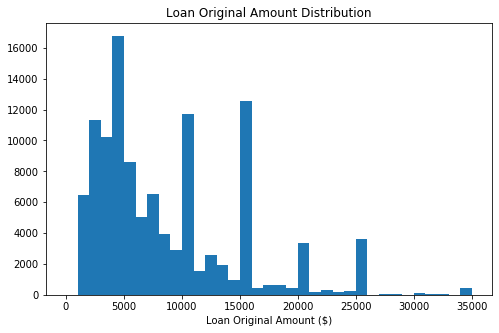

In [15]:
# Loan Original Amount Distribution
binsize = 1000
bins = np.arange(0, df_loans_clean['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount Distribution')
plt.show()

- There's a long tail in the distribution, so let's put it on a log scale instead

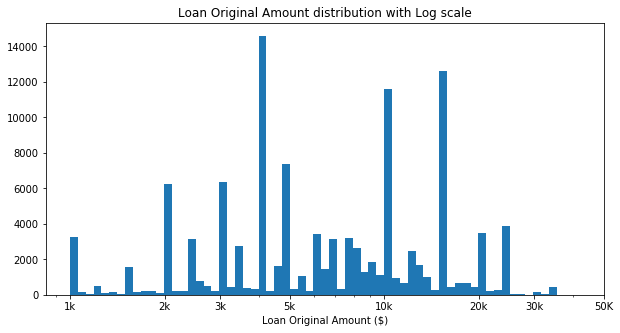

In [16]:
# Putting it in a log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans_clean['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)')
plt.title('Loan Original Amount distribution with Log scale')
plt.show()

- There is a peak between \\$3000 and \\$5000

In [17]:
#Checking loans' term
df_loans_clean.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

- It is obvious that loan term is either 1, 3 or 5 years

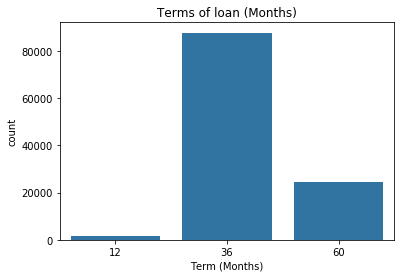

In [18]:
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans_clean,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

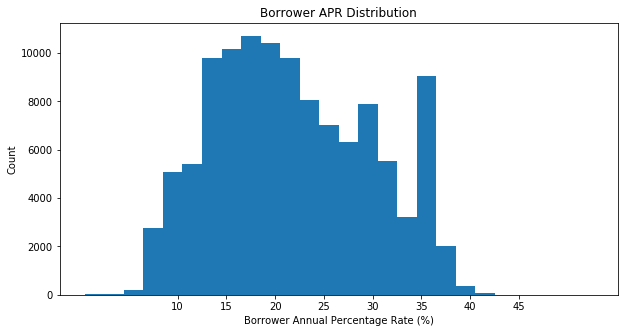

In [19]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = df_loans_clean['BorrowerAPR']*100
bins = np.arange(0.5, df_loans_clean['BorrowerAPR'].max()*100+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(x = borroweAPRPct, bins = bins)
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plt.title('Borrower APR Distribution')
plt.show()

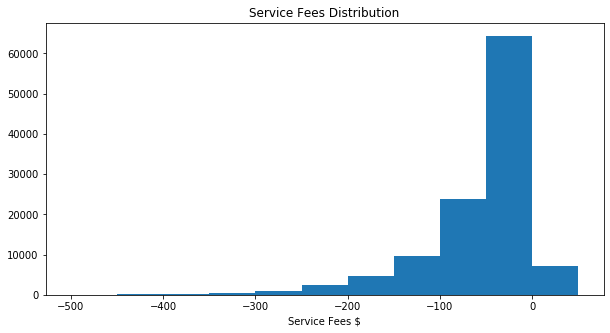

In [20]:
# Service Fees Distribution
binsize = 50
bins = np.arange(-500, df_loans_clean['LP_ServiceFees'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'LP_ServiceFees', bins = bins)
plt.xlabel('Service Fees $')
plt.title('Service Fees Distribution')
plt.show()

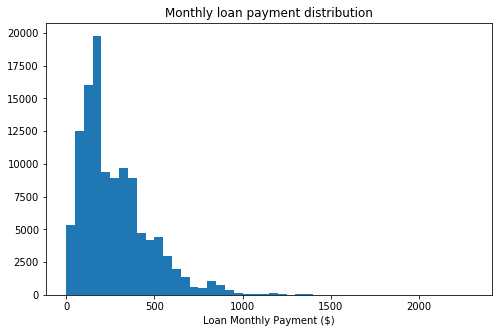

In [21]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans_clean['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Loan Monthly Payment ($)')
plt.title('Monthly loan payment distribution')
plt.show()

- There's a long tail in the distribution, so let's put it on a log scale instead

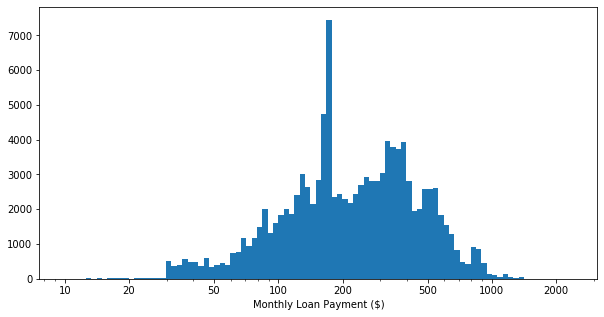

In [22]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans_clean['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.show()

- It is interesting to see the details of the region under \\$500 and the peak between \\$100 and \\$200

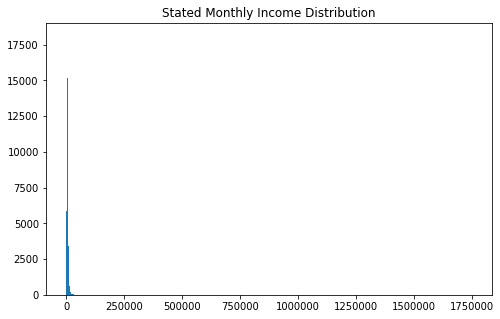

In [23]:
# Stated Monthly income distribution
binsize = 1000
bins = np.arange(0, df_loans_clean['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.title('Stated Monthly Income Distribution')
plt.show()

- No details can be seen due to high skewness and the far outliers above the 1000,000 so, lets see it in log-scale
- It is much better to exlude the outliers as well by limiting the x-axis to \\$50,000

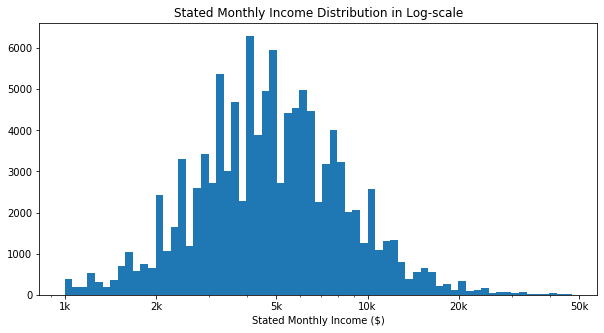

In [24]:
# Using log-scale
#In addition, truncate the X axis to show only values less than 50k which are the majority of data
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Stated Monthly Income ($)')
plt.title('Stated Monthly Income Distribution in Log-scale')
plt.show()

- Graph is much more interesting now, almost normal distribution of income.
- Interesting to see the peak around \\$5K

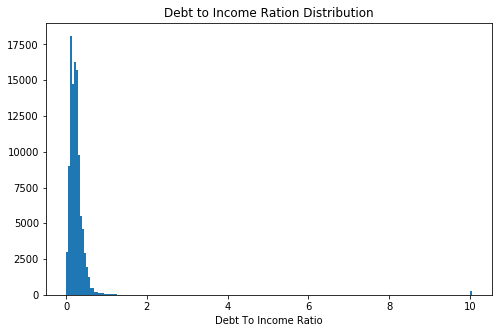

In [25]:
#Debt to Income Ration Distribution
binsize = 0.05
bins = np.arange(0, df_loans_clean['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt To Income Ratio')
plt.title('Debt to Income Ration Distribution')
plt.show()

- DebtToIncomeRatio ranges from 0 to 10, however most values are between 0.14 and 0.33. we can consider all above 1 are outliers
- It is better to check it in log-scale without the outliers

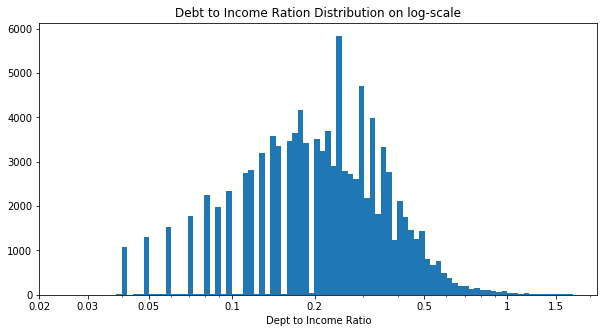

In [26]:
#Debt to Income Ration Distribution with log scale and truncate to values less than 1.8
log_binsize = 0.02
bins = 10 ** np.arange(-1.5, 0.25, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = df_loans_clean, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([2e-2, 3e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 1.5], ['0.02','0.03', '0.05', '0.1', '0.2', '0.5', '1', '1.5'])
plt.xlabel('Dept to Income Ratio')
plt.title('Debt to Income Ration Distribution on log-scale')

plt.show()

- Interestingly, it is normally distributed around the 20% ratio

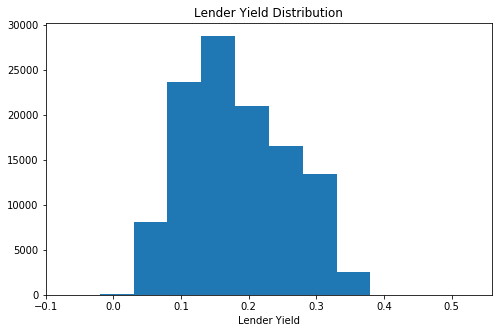

In [27]:
#Lender Yield Distribution
binsize = 0.05
bins = np.arange(-.07, df_loans_clean['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'LenderYield', bins = bins)
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')

plt.show()

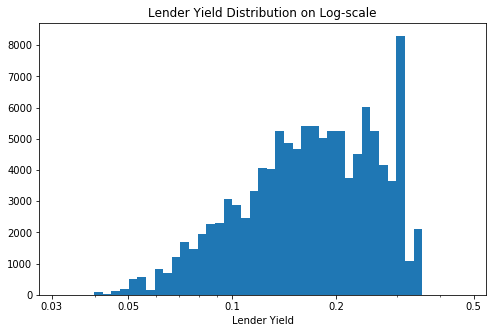

In [28]:
#Lender Yield Distribution with log scale and truncation
log_binsize = 0.025
bins = 10 ** np.arange(-1.5, -0.3, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'LenderYield', bins = bins)
plt.xscale('log')
plt.xticks([3e-2, 5e-2, 1e-1, 2e-1, 5e-1], ['0.03', '0.05', '0.1', '0.2', '0.5'])
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution on Log-scale')

plt.show()

In [29]:
df_loans_clean.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

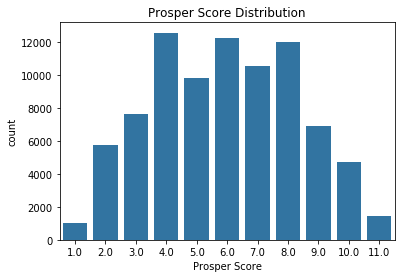

In [30]:
#Prosper Score Distribution
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans_clean,x= 'ProsperScore',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

- Prosper score of value 4 and 6 are the most common
- Prosper Scores are almost normally distributed

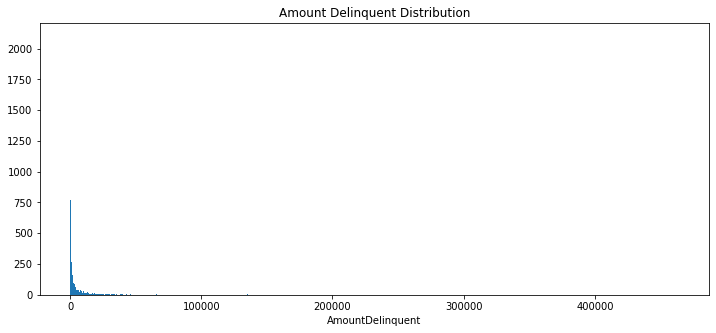

In [31]:
#Amount Delinquent Distribution

binsize = 100
bins = np.arange(1, df_loans_clean['AmountDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans_clean[df_loans_clean['AmountDelinquent']>0], x = 'AmountDelinquent', bins = bins)
plt.xlabel('AmountDelinquent')
plt.title('Amount Delinquent Distribution')
plt.show()

- Again, nothing can be noticed due to high skewness
- Also, most of the loans do not have delinquence. It is better checking this in log-scale

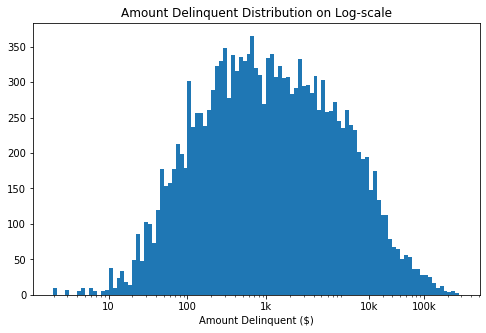

In [32]:
#Amount Delinquent Distribution on a log scale

log_binsize = 0.05
bins = 10 ** np.arange(0.3, 5.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'AmountDelinquent', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3, 2e4, 1e5], ['10', '100', '1k', '10k', '100k'])
plt.xlabel('Amount Delinquent ($)')
plt.title('Amount Delinquent Distribution on Log-scale')
plt.show()

- It is obvious that most amounts delinquent falls around \\$700 and \\$1000

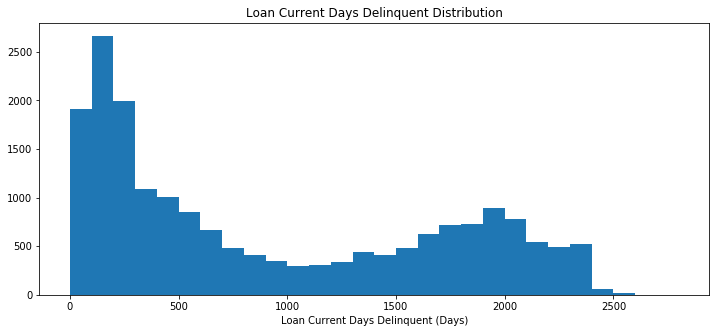

In [33]:
# Loan Current Days Delinquent Distribution
binsize = 100
bins = np.arange(0, df_loans_clean['LoanCurrentDaysDelinquent'].max()+binsize, binsize)

plt.figure(figsize=[12, 5])
plt.hist(data = df_loans_clean[df_loans_clean['LoanCurrentDaysDelinquent']>0], x = 'LoanCurrentDaysDelinquent', bins = bins)
plt.xlabel('Loan Current Days Delinquent (Days)')
plt.title('Loan Current Days Delinquent Distribution')
plt.show()

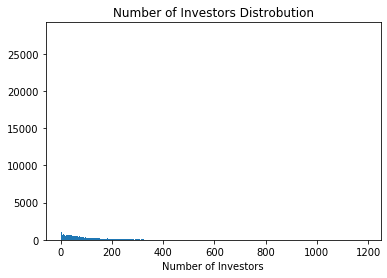

In [34]:
#Number of Investors Distrobution
binsize = 1
bins = np.arange(1, df_loans_clean['Investors'].max()+binsize, binsize)

#plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean[df_loans_clean['Investors'] > 0], x = 'Investors', bins = bins)
plt.xlabel('Number of Investors')
plt.title('Number of Investors Distrobution')
plt.show()

- Better to be checked in Log-scale

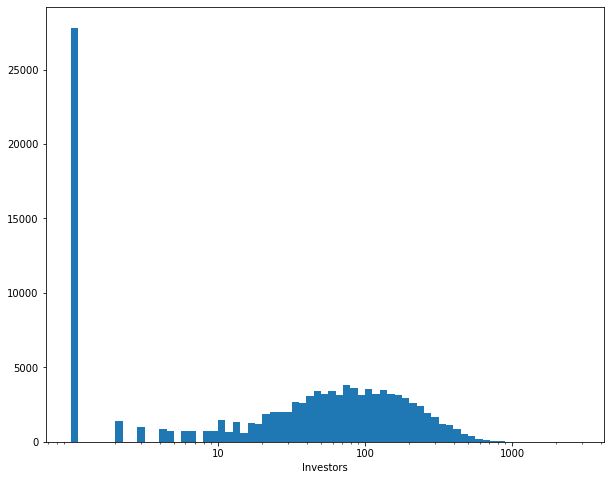

In [35]:
#Number of Investors Distrobution on log scale for all loans
log_binsize = 0.05
bins = 10 ** np.arange(0, 3.5, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans_clean, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.show()

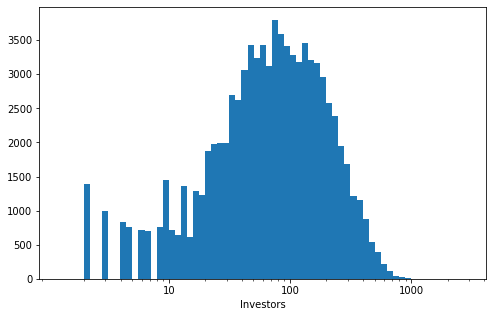

In [36]:
#We can plot the same for only loans with more than 1 investor
log_binsize = 0.05
bins = 10 ** np.arange(0.1, 3.5, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans_clean, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 1e3], ['10', '100', '1000'])
plt.xlabel('Investors')
plt.show()

- Number of investors (for data with number of inestoers more than 1) is almost normally distributed around 60 to 80

#### Categorical Columns <a class="anchor" id="cat-cols"></a>

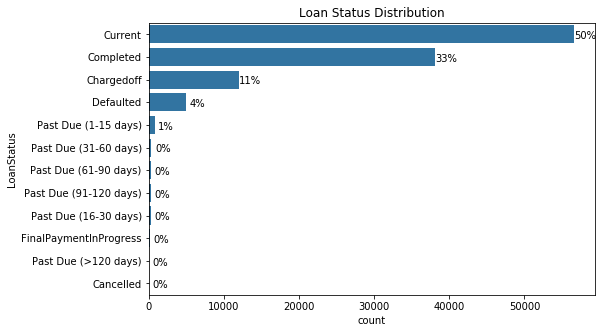

In [37]:
# Loan Status Distribution
status_order = df_loans_clean['LoanStatus'].value_counts().index

plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,y='LoanStatus',color=base_color,order=status_order);
plt.title('Loan Status Distribution')

# add annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['LoanStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

- Most of the loans are `Current`

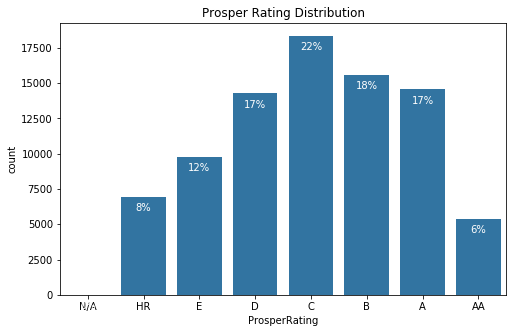

In [38]:
# Prosper Rating Distribution

plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x='ProsperRating',color=base_color);
plt.title('Prosper Rating Distribution')

# add annotations
n_points = df_loans_clean[df_loans_clean.ProsperRating.isna() == False].shape[0]
cat_counts = df_loans_clean['ProsperRating'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,  count-1000, pct_string, ha = 'center', color = 'w');

- Most borrowers get Prosper Rating of 'C'

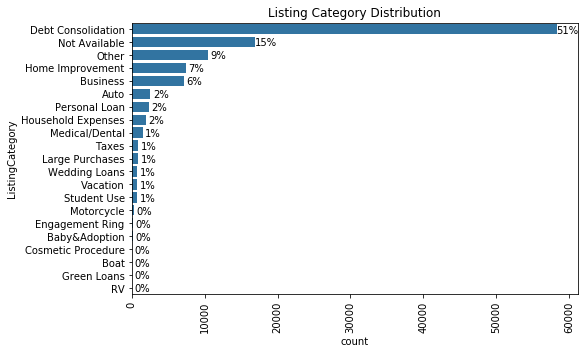

In [39]:
#Listing Category Distrobution
cat_order = df_loans_clean.ListingCategory.value_counts().index
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,y='ListingCategory',color=base_color, order=cat_order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=90)

# add annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['ListingCategory'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1400, loc+0.3,  pct_string, ha = 'center', color = 'black');

- It seems many people take loans to pay off other loans

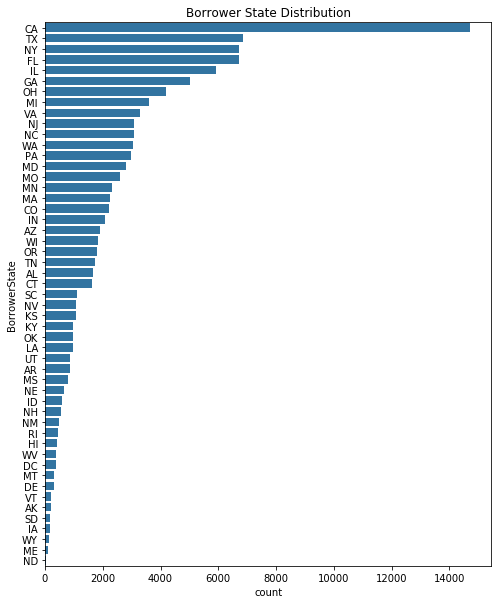

In [40]:
#Borrower State Distrobution
cat_order = df_loans_clean.BorrowerState.value_counts().index
plt.figure(figsize=[8, 10])
sb.countplot(data=df_loans_clean,y='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

- States `California`, `Texas` and `New York` have the 3 biggest numbers of loans originated in that period of time

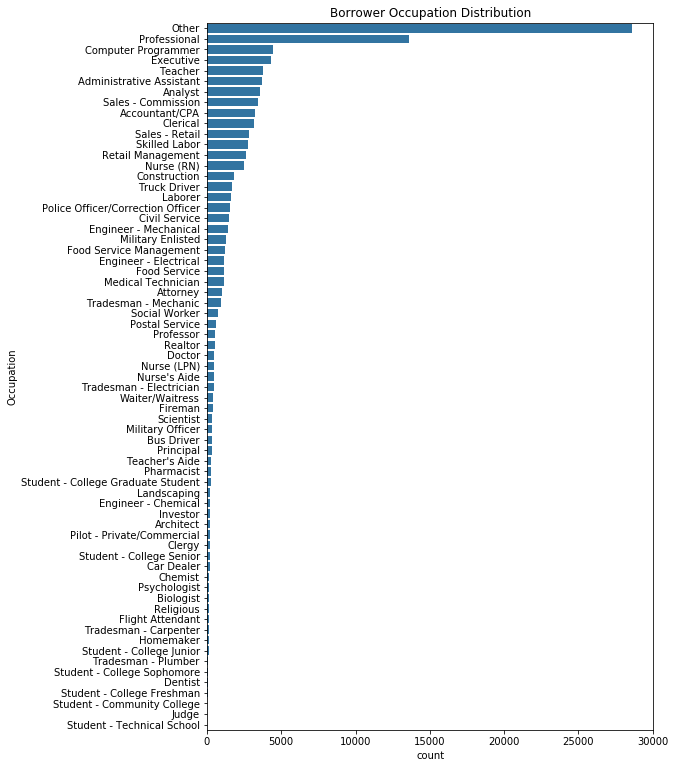

In [41]:
#Borrower Occupation Distrobution
cat_order = df_loans_clean.Occupation.value_counts().index
plt.figure(figsize=[8, 13])
sb.countplot(data=df_loans_clean,y='Occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution');

- Most borrowers' occupations (excluding the `others` group) are: `Professional`, `Computer Engineer` and `Executive`
- It is interesting to see that `Students`, `Judges`, `Dentists` and `Biologists` are the least occupations taking loans

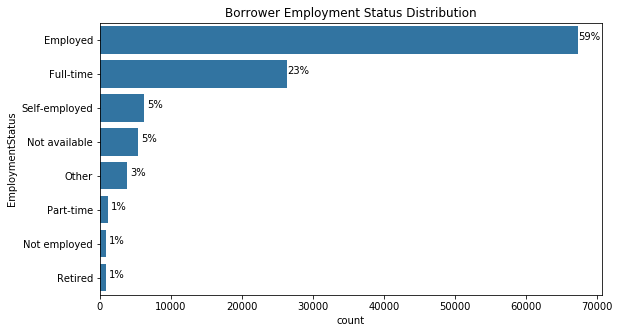

In [42]:
#Borrower Employment Status Distrobution
cat_order = df_loans_clean.EmploymentStatus.value_counts().index
plt.figure(figsize=[9, 5])
sb.countplot(data=df_loans_clean,y='EmploymentStatus',color=base_color, order=cat_order);
plt.title('Borrower Employment Status Distribution')

# add annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['EmploymentStatus'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

- Most loan takers are employed and this makes sense

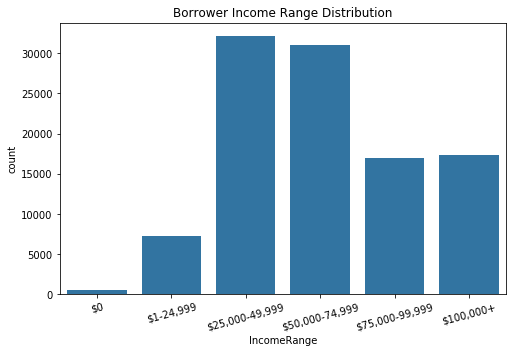

In [43]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x='IncomeRange',color=base_color);
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=15);

- It is clear that people with yearly income range of \\$25,000-49,999 are the most taking loans

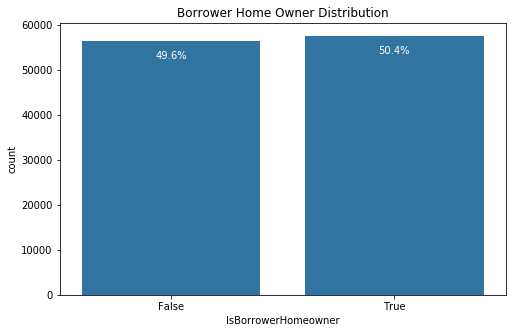

In [44]:
#Is Borrower-Homeowner Status Distrobution
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sb.color_palette()[0]
sb.countplot(data = df_loans_clean, x = 'IsBorrowerHomeowner', color = base_color)

# add annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['IsBorrowerHomeowner'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

plt.title('Borrower Home Owner Distribution');

- It seems that owning a house or not has no effect to taking loans

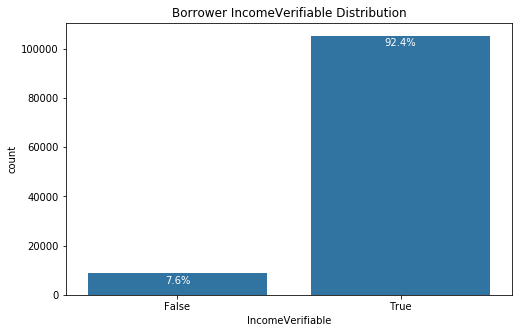

In [45]:
#Is Income-Verifiable Status Distrobution
plt.figure(figsize=[8, 5])

def str2bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sb.color_palette()[0]
sb.countplot(data = df_loans_clean, x = 'IncomeVerifiable', color = base_color)

# add annotations
n_points = df_loans_clean.shape[0]
cat_counts = df_loans_clean['IncomeVerifiable'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str2bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

#sb.countplot(data=df_loans_clean,x='IsBorrowerHomeowner',color=base_color);
plt.title('Borrower IncomeVerifiable Distribution');

- Most of the people taking loans have verifiable income, which might be a requirement for taking loans

#### Time Columns <a class="anchor" id="time-cols"></a>

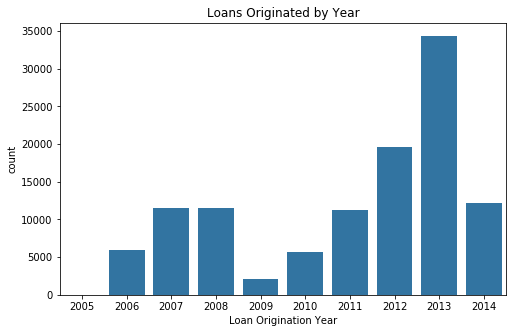

In [46]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x=df_loans_clean['LoanOriginationDate'].dt.year,color=base_color)
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

- Considering the recession happened in 2008, a drop is seen in loan origination in 2009 and then started to recover

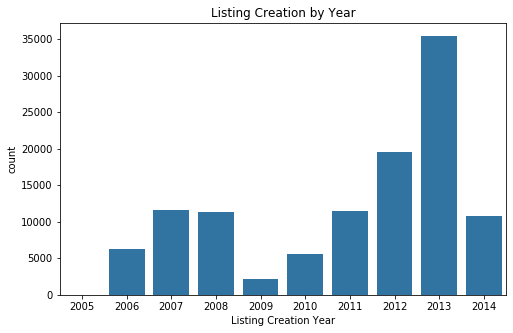

In [47]:
# Listing Creation  by Year
plt.figure(figsize=[8, 5])
sb.countplot(data=df_loans_clean,x=df_loans_clean['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

- The same observation as the previous chart

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> There was no need for any transformations other that changing the data types of some variables. Also, after plotting, it was found that some features should be changed to 'Categorical' like `IncomeRange`, other features like `ProsperScore` are almost fixed to specific values, but prefered to keep in numeric format so as to be able to do some calculation on it like average if needed.

> It was noticed there are some outliers in the `StatedMonthlyIncome` that are too far away from most of the values, in some charts these outliers are igonred by limiting the axis values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some features had long-tailed, skewed distributions, these were checked on a log-scale which revealed the hidden distribution in some areas.

## Bivariate Exploration <a class="anchor" id="bivariate"></a>

> To investigate variables in pairs, we need to identify numeric and categorical features in order to select the proper chart type.

In [48]:
#Create lists for numeric and categorical variables
numeric_vars =['Term', 'BorrowerAPR', 'LenderYield', 'ProsperScore', 'AmountDelinquent', 'DebtToIncomeRatio',\
               'StatedMonthlyIncome','LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment',\
               'LP_ServiceFees', 'Investors']
categoric_vars = ['LoanStatus', 'ProsperRating', 'ListingCategory', 'BorrowerState', 'Occupation', 'EmploymentStatus',\
                  'IncomeRange']

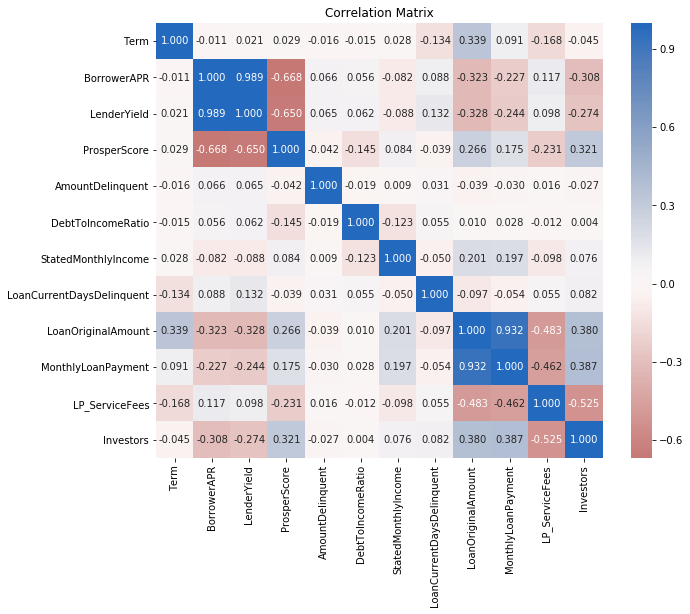

In [49]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 8])
sb.heatmap(df_loans_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

C:\Users\Peter.PETER-HOME\.conda\envs\udacity_env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Peter.PETER-HOME\.conda\envs\udacity_env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


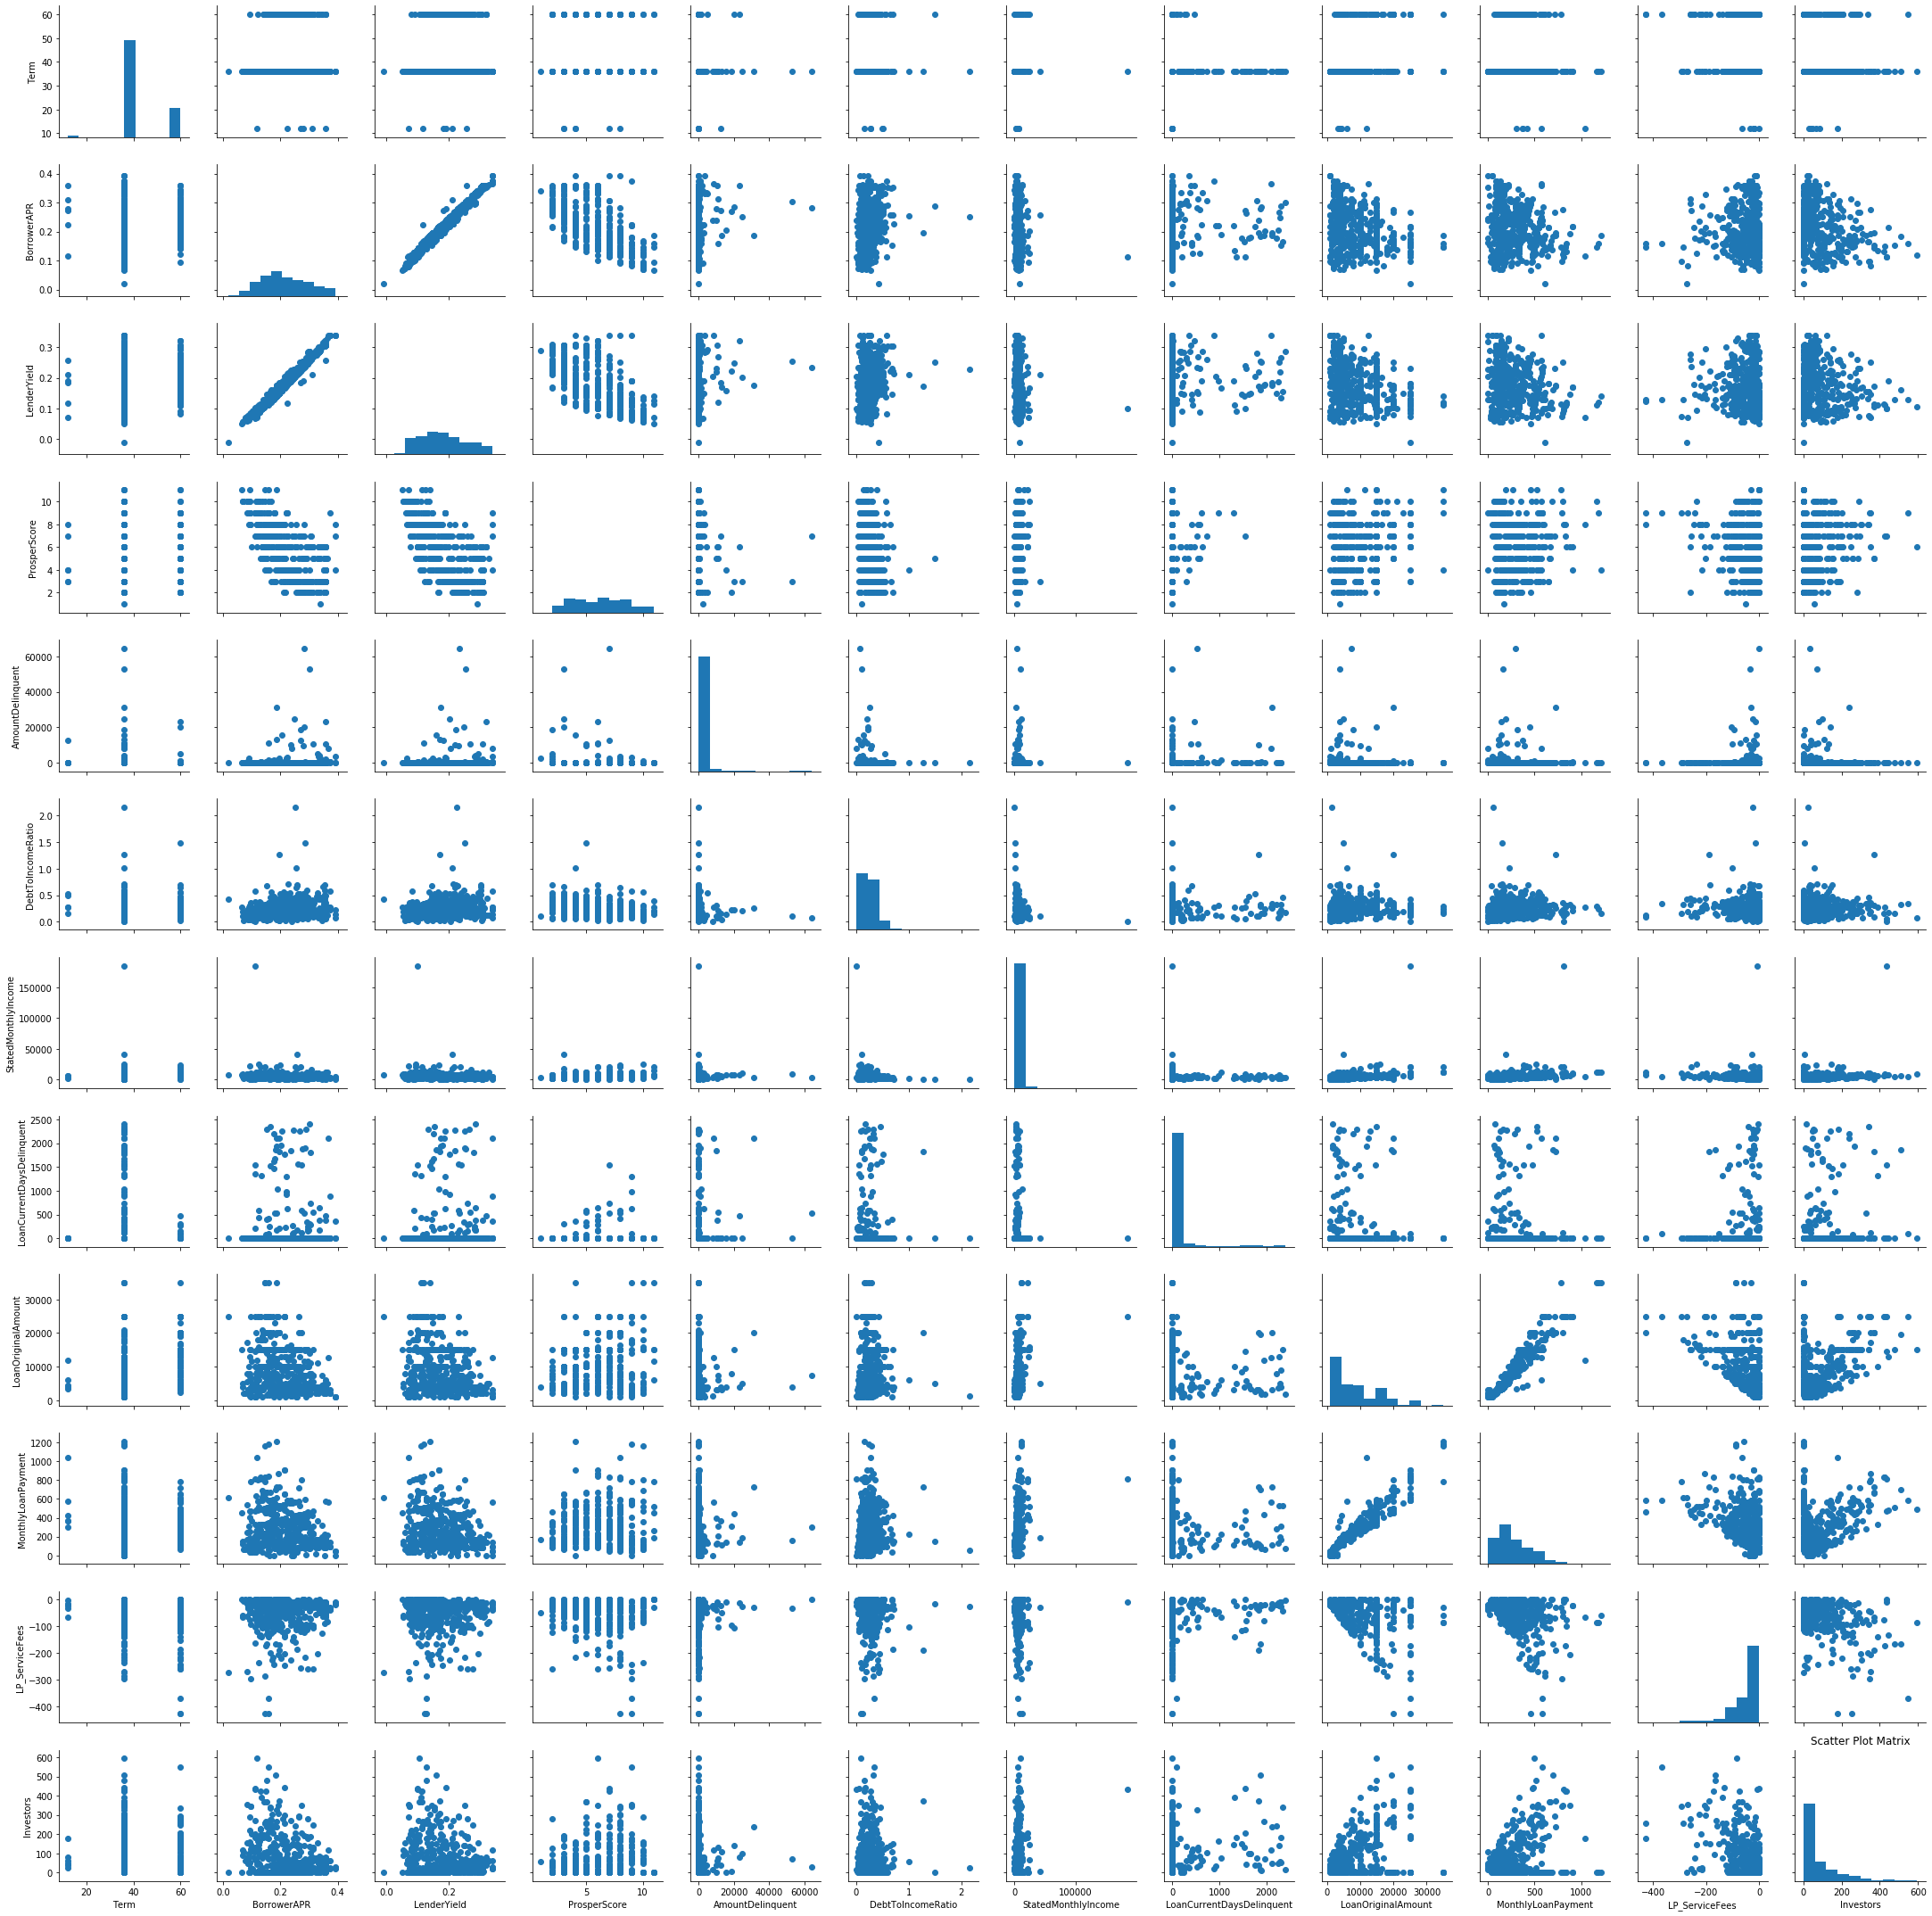

In [50]:
# Taking a sample of 500 loans 
samples = np.random.choice(df_loans_clean.shape[0], 500, replace = False)
loans_samp = df_loans_clean.loc[samples,:]

# Building a grid of scatter plots
g = sb.PairGrid(data = loans_samp, vars = numeric_vars)
g.map_offdiag(plt.scatter)
g = g.map_diag(plt.hist, bins = 10)
plt.title('Scatter Plot Matrix');

- Based on the correlation matrix and the scatter plots above, there are some relations of interest:

  * `BorrowerAPR` and `LenderYield`: Strong positive relationship and this makes sense, the higher the rate the higher the lender earns
  * `LoanOriginalAmount` and `MonthlyLoanPayment`: Strong positive relationship, also makes sense, the bigger the loan the bigger the monthly payments
  * `ProsperScore` and `BorrowerAPR`: Negative relationship, lower score means higher risks and hence higher interest rates.
  * `LenderYield` and `ProsperScore`: negative relationship, this is also logic, the higher the score, lower interest rate and hence lower lender yield.
  * `LoanOriginalAmount` and `BorrowerAPR`, negative relationship, we may expect that the bigger the loan amount the less the interest rate.

- Next charts explore some of these relationships 


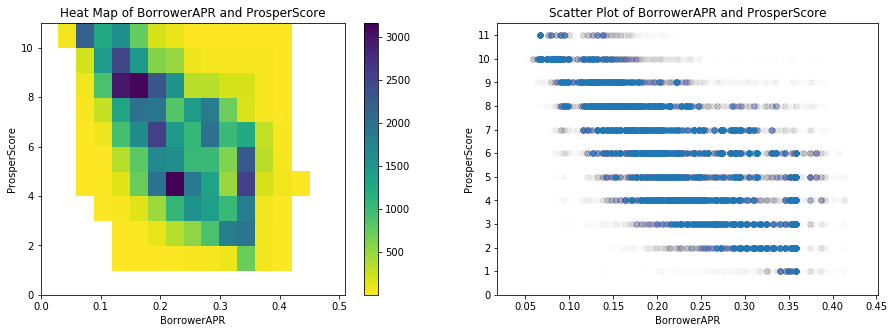

In [51]:
# Checking the relation between ProsperScore and BorrowerAPR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loans_clean['BorrowerAPR'].max()+0.02, 0.03)
bins_y = np.arange(0, df_loans_clean['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_loans_clean, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = df_loans_clean, x = 'BorrowerAPR', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of BorrowerAPR and ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

- This shows a negative relationship, a lower ProsperScore leads to higher borrower rate and that makes sense

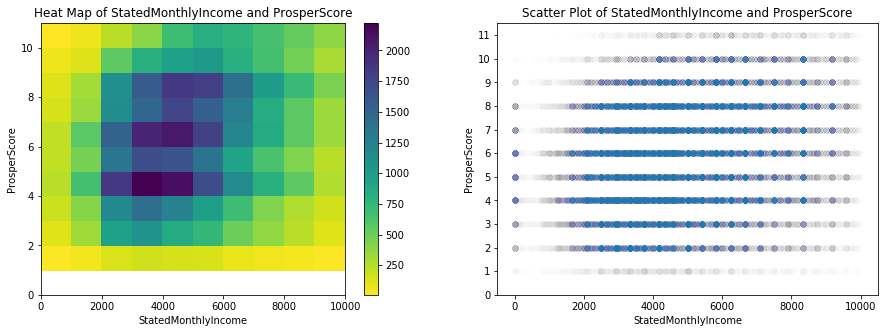

In [52]:
# Checking the relation between ProsperScore and StatedMonthlyIncome

df_wo_outlier=df_loans_clean[df_loans_clean['StatedMonthlyIncome'] < 10000]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_wo_outlier['StatedMonthlyIncome'].max()+1000, 1000)
bins_y = np.arange(0, df_wo_outlier['ProsperScore'].max()+1, 1)
plt.hist2d(data = df_wo_outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data = df_wo_outlier, x = 'StatedMonthlyIncome', y = 'ProsperScore', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of StatedMonthlyIncome and ProsperScore')
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

- On the other hand, ProsperScore is positively related to the stated monthly income, also makes sense

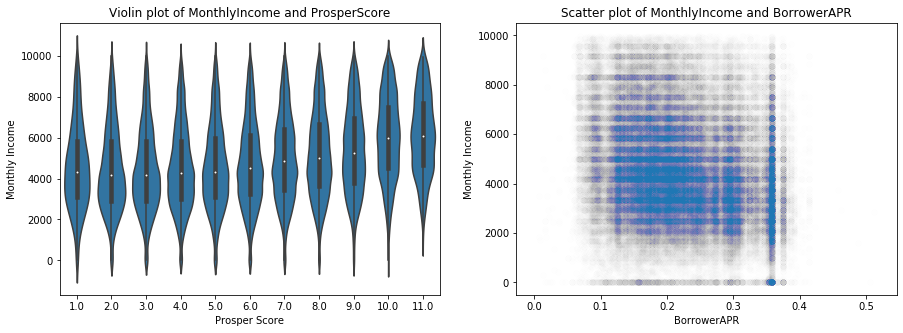

In [53]:
# Stated MonthlyIncome  Prosper Rating
# Since 75% of the data has StatedMonthlyIncome less than 6825, we can plot data within this range
df_wo_outlier=df_loans_clean[df_loans_clean['StatedMonthlyIncome'] < 10000]

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sb.violinplot(data=df_wo_outlier,x='ProsperScore', y='StatedMonthlyIncome',color=base_color);
plt.xlabel('Prosper Score');
plt.ylabel('Monthly Income');
plt.title('Violin plot of MonthlyIncome and ProsperScore');

plt.subplot(1, 2, 2)
plt.scatter(data=df_wo_outlier,x='BorrowerAPR', y='StatedMonthlyIncome',color=base_color, alpha =  0.005);
plt.xlabel('BorrowerAPR');
plt.ylabel('Monthly Income');
plt.title('Scatter plot of MonthlyIncome and BorrowerAPR');

- On the left, violin plots show that higher prosper scores have higher mean income
- On the right side, the higher the income, the lower the borrower rate


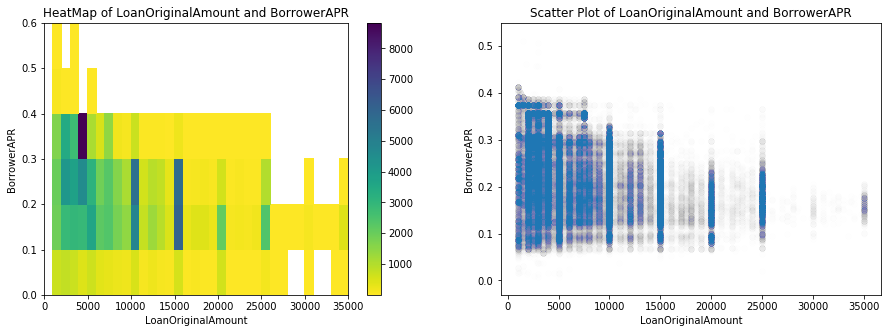

In [54]:
# Checking the relation between ProsperScore and StatedMonthlyIncome

plt.figure(figsize = [15, 5]) 


plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loans_clean['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(0, df_loans_clean['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = df_loans_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR')
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')

plt.colorbar()


plt.subplot(1, 2, 2)
plt.scatter(data = df_loans_clean, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.005)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

- This shows a negative relationship, means large loans have relatively less interest rate.

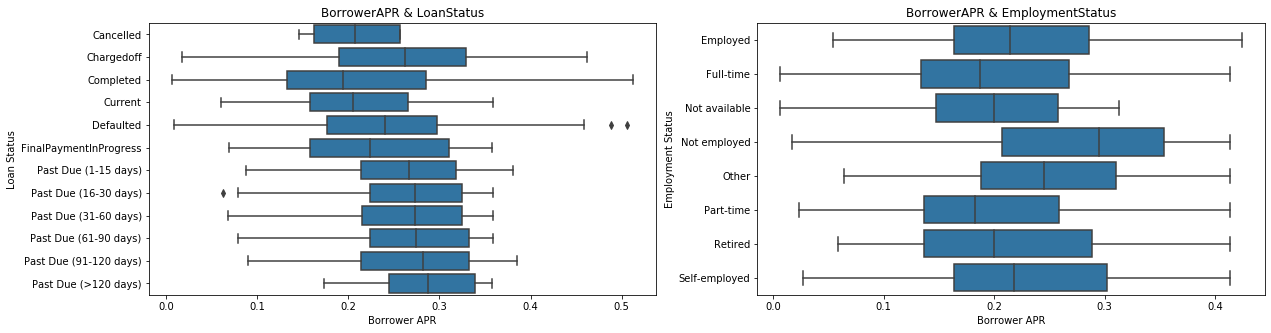

In [55]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sb.boxplot(data=df_loans_clean,x='BorrowerAPR',y='LoanStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('BorrowerAPR & LoanStatus');

plt.subplot(1, 2, 2)
sb.boxplot(data=df_loans_clean,x='BorrowerAPR',y='EmploymentStatus',color=base_color);
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('BorrowerAPR & EmploymentStatus');

- On the left: Current and completed loans have lower rate than the past-due loans
- On the right: Employed people have lower rates than not employed

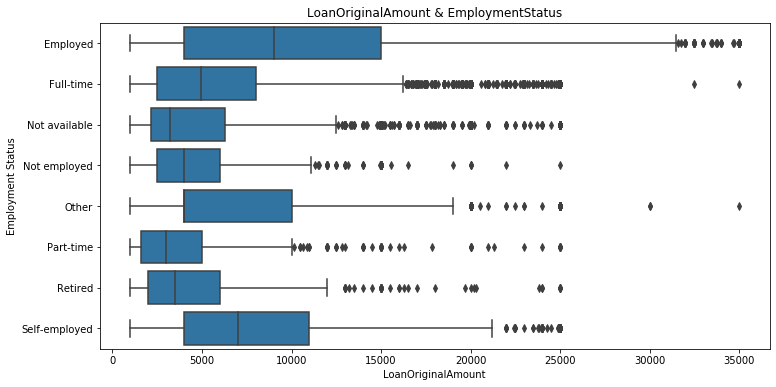

In [56]:
plt.figure(figsize = [12, 6])
sb.boxplot(data=df_loans_clean,x='LoanOriginalAmount',y='EmploymentStatus',color=base_color);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Employment Status');
plt.title('LoanOriginalAmount & EmploymentStatus');

- Employed people can get larger loan amounts compared to all other categories

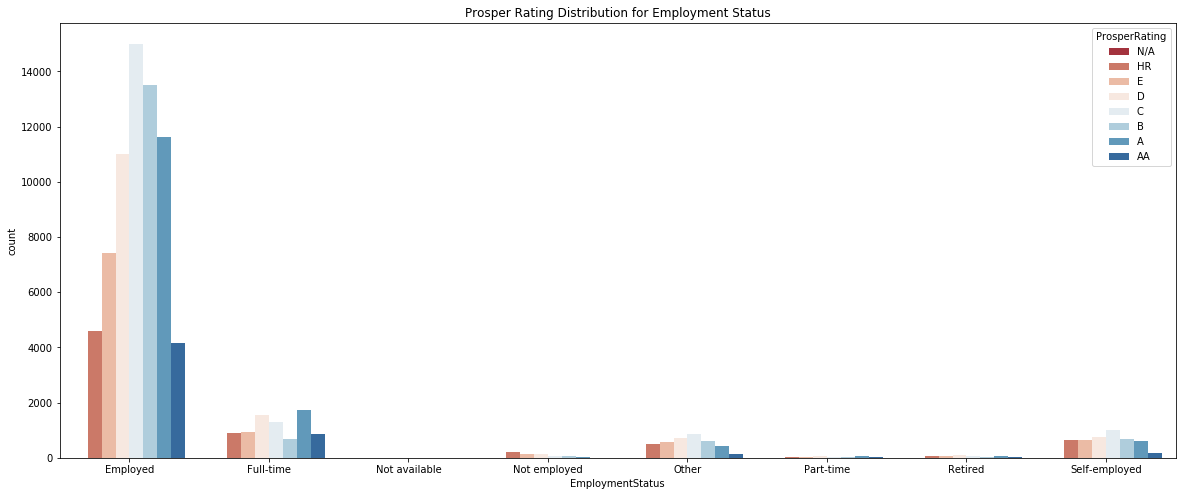

In [57]:
plt.figure(figsize = [20, 8])
sb.countplot(data = df_loans_clean, x = 'EmploymentStatus', hue = 'ProsperRating', palette='RdBu')
plt.title('Prosper Rating Distribution for Employment Status');

- It is noticed that `Employed` people get rating `C` or above while `Not Employed` recieve mostly `HR` means `High Risk` and this makes sense

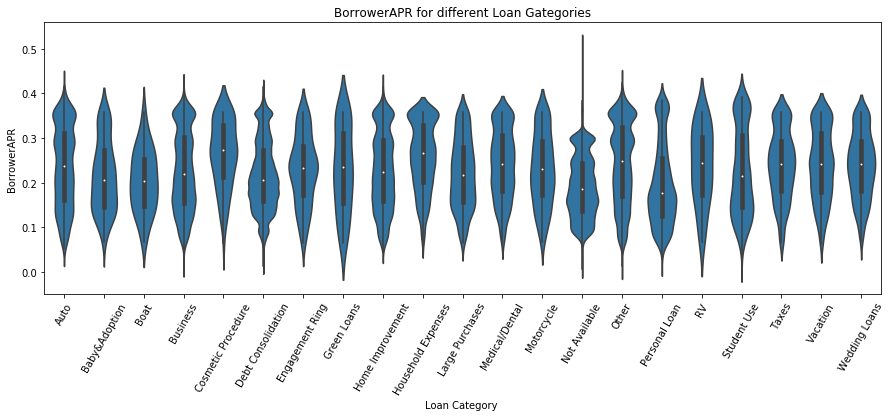

In [58]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=df_loans_clean,x='ListingCategory', y='BorrowerAPR',color=base_color);
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');
plt.title('BorrowerAPR for different Loan Gategories')
plt.xticks(rotation=60);

- It is noticed that mostly `Cosmetic Procedure` are given higer interest rates 

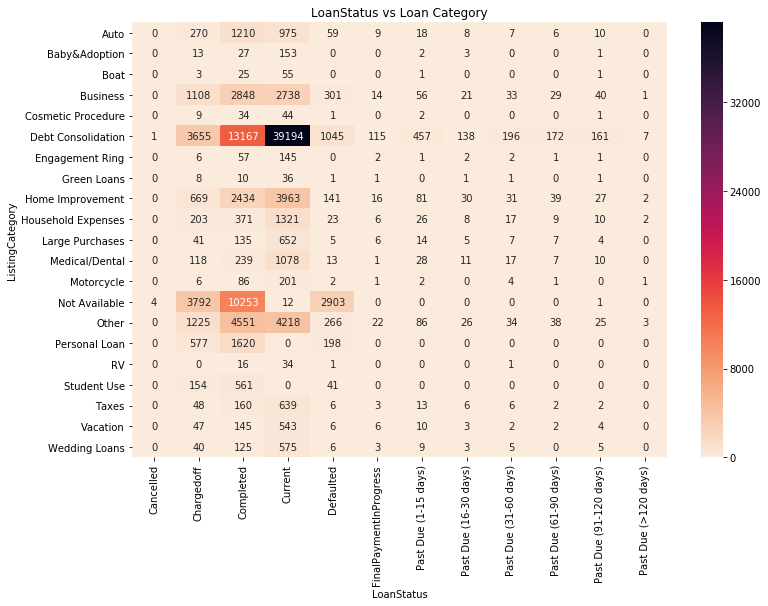

In [59]:
cat_counts = df_loans_clean.groupby(['ListingCategory', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'ListingCategory', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [12, 8])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('LoanStatus vs Loan Category');

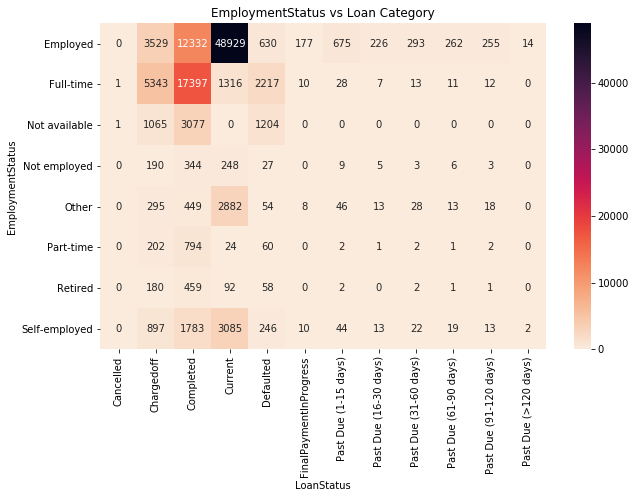

In [60]:
cat_counts = df_loans_clean.groupby(['EmploymentStatus', 'LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts = cat_counts.pivot(index = 'EmploymentStatus', columns = 'LoanStatus', values = 'count')
cat_counts.fillna(0, inplace=True)

plt.figure(figsize = [10, 6])
sb.heatmap(cat_counts, cmap = 'rocket_r', annot = True, fmt = ".0f")
plt.title('EmploymentStatus vs Loan Category');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> It is noticed that `EmploymentStatus` and `StatedMonthlyIncome` affect both of the main features (`BorrowerAPR` and `ProsperScore`)
    - People who are not employed receive low score and high interest rate compared to the employed
    - The higher the income, the higher the score and the lower the interest rate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was observed that `EmploymentStatus` has a relation with `ProsperRating` where the un-employed are mostly given a `High Risk` rating

> Number of `Defaulted` loans for `Self-employed` people are larger than those for `Not Employed`

## Multivariate Exploration <a class="anchor" id="multivariate"></a>

> It was noticed that where `EmploymentStatus` is `Not Available` the `ProsperScore` is `NaN`, we will try to consider this in some plots 

In [61]:
 df_loans_clean[df_loans_clean['EmploymentStatus'] == 'Not available'].head()[['EmploymentStatus','ProsperScore']]

,EmploymentStatus,ProsperScore
2,Not available,NaN
17,Not available,NaN
42,Not available,NaN
63,Not available,NaN
76,Not available,NaN


In [62]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(0, 12, 1)
    bins_y = np.arange(0, 0.6, 0.1)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 0.5)

C:\Users\Peter.PETER-HOME\.conda\envs\udacity_env\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


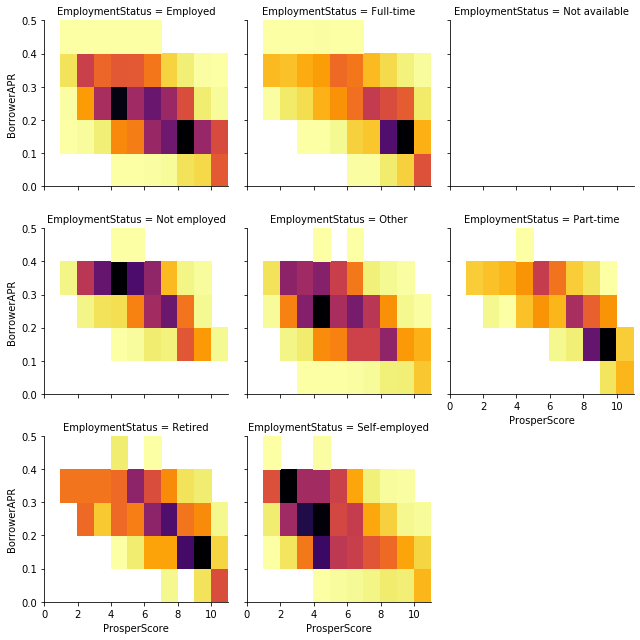

In [63]:
# create faceted heat maps on the EmploymentStatus
g = sb.FacetGrid(data = df_loans_clean[df_loans_clean['EmploymentStatus'] != 'Not available'],\
                 col = 'EmploymentStatus', col_wrap = 3, size = 3)
g.map(hist2dgrid, 'ProsperScore', 'BorrowerAPR', color = 'inferno_r')
g.set_xlabels('ProsperScore')
g.set_ylabels('BorrowerAPR');

- Interesting things about the above heatmaps:
  - Employed people are diverse regarding the ProsperScore and BorrowerAPR
  - Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
  - Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
  - Retired people have higher ProsperScore and lower BorrowerAPR 

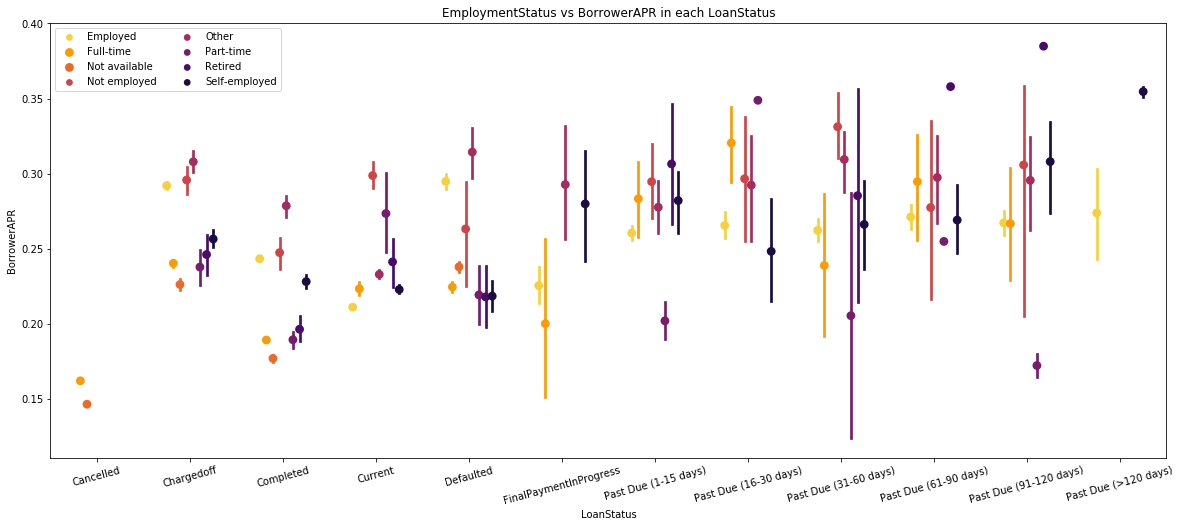

In [64]:
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = df_loans_clean, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

- Past Due loans generally have higher interest rates in all employment statuses

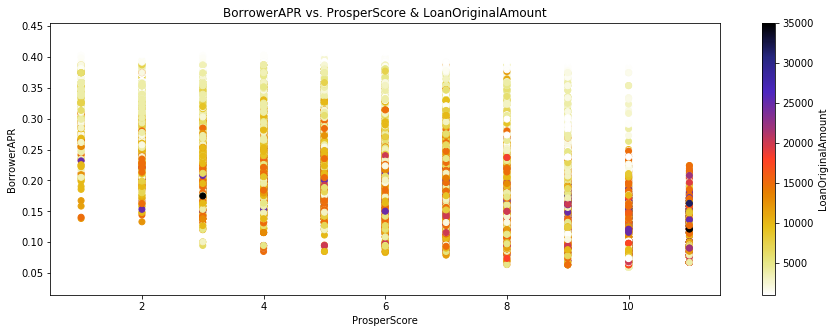

In [65]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = df_loans_clean[df_loans_clean['StatedMonthlyIncome'] <20000],\
            x = 'ProsperScore', y = 'BorrowerAPR', c ='LoanOriginalAmount', cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore & LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

- It is noticed as was showed previously the negative relationship between prosperscore and borrowerAPR, in addition to this, the chart shows most of the loans with higher amounts (>\\$20,000) are taken by people with higher prosper score (10 and above)

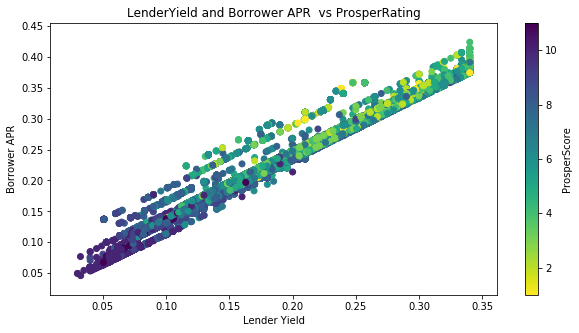

In [66]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loans_clean,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('LenderYield and Borrower APR  vs ProsperRating');

- This chart confirms the relations between BorrowerAPR and LenderYield, they have strong positive relationship
- In addition, it shows that most of loans with lower BorrowerAPR & LenderYield  have higher ProsperScore and visa-versa

In [67]:
# Make a dataframe sorted correctly by quarter

time_series = df_loans_clean.groupby(df_loans_clean['LoanOriginationQuarter']).count().reset_index()

time_series.LoanOriginationQuarter = pd.Categorical(time_series.LoanOriginationQuarter, 
                                                    sorted(time_series.LoanOriginationQuarter, 
                                                           key=lambda x: x.split(' ')[-1]), ordered = True)
time_series.sort_values('LoanOriginationQuarter', inplace=True)

quarters = time_series['LoanOriginationQuarter'].to_list()
quarters

df = df_loans_clean.copy()

ordinal_var_dict = {'LoanOriginationQuarter': quarters}

ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict['LoanOriginationQuarter'])
df['LoanOriginationQuarter'] = df['LoanOriginationQuarter'].astype(ordered_var)

## Count Loans by Quarter and Loans Status

cat_counts = df.sort_values(by=['LoanOriginationDate']).groupby(['LoanOriginationQuarter','LoanStatus']).count()['LoanOriginationDate']
cat_counts = cat_counts.reset_index()
cat_counts = cat_counts.rename(columns={'LoanOriginationDate': 'count'}) 
cat_counts['count'] = cat_counts['count'].fillna(0)


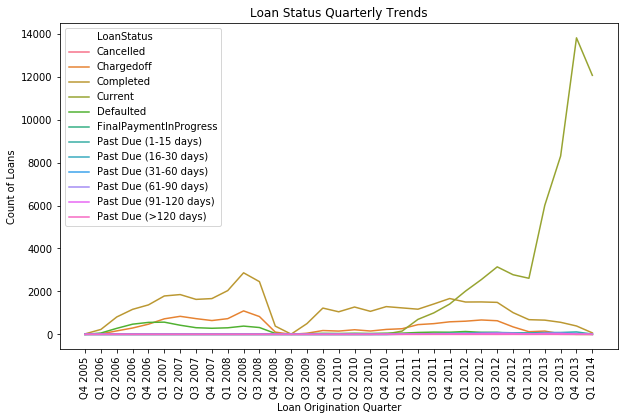

In [68]:
# Plot line chart with each line shows the trend of a Loan Status 
plt.figure(figsize = [10, 6])
sb.lineplot(data=cat_counts, x = 'LoanOriginationQuarter', y='count', hue='LoanStatus')
plt.xticks(quarters, rotation = 90)
plt.xlabel('Loan Origination Quarter')
plt.ylabel('Count of Loans')
plt.title('Loan Status Quarterly Trends');

- Intersting to notice that `Defaulted` loans decreased after Q4-2008, also `Current` loans increased rapidly in 2013 (and it is logic that no `Current` loans before 2011 as the maximum loan term is 5 years)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relation between `EmploymentStatus`, `ProsperScore` and `BorrowerAPR`
  - Employed people are diverse regarding the ProsperScore and BorrowerAPR
  - Full-Time and part-time tend to have higher ProsperScore and lower BorrowerAPR
  - Not-Employed & Self-Employed tend to have lower ProsperScore and higher BorrowerAPR
  - Retired people have higher ProsperScore and lower BorrowerAPR 

### Were there any interesting or surprising interactions between features?

> It was important to notice the fact that loans with higher `LoanOriginalAmount` are mostly taken by people with higher `ProsperScore`

### Refereces <a class="anchor" id="ref"></a>
https://kite.com/python/answers/how-to-convert-a-string-to-a-boolean-in-python

https://www.kaggle.com/yousuf28/prosper-loan

For explanations of financial terms related to loans: https://www.investopedia.com/